In [2]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

In [ ]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

1. ¿Cuál es el perfil de un/una analista de datos?

Perfil del analista de datos: género, edad, nivel de estudios más alto alcanzado, cuánto llevan programando. Estado de la brecha de género.

¿Cuál es el perfil de un analista de datos?

Q1-edad

Q2-genero

Q3-país . Tal vez agrupar por continente o lo que veamos.

Q4-educación.

Q5- Ocupación. Tal vez agrupar por técnico, perfil de producto, estudiante

Q6- Experiencia. Está en rangos

In [3]:
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,...,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 89 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   q1_edad              25973 non-null  object
 1   q2_genero            25973 non-null  object
 2   q3_país              25973 non-null  object
 3   q4_educacion         25973 non-null  object
 4   q5_ocupacion         25973 non-null  object
 5   q6_exp_tech          25973 non-null  object
 6   q8_l_recomendado     24940 non-null  object
 7   q11_tipo_plataforma  24720 non-null  object
 8   q20_i_actual         16325 non-null  object
 9   q21_tamanio_cia      16251 non-null  object
 10  q22_da_cia           16126 non-null  object
 11  q25_salario          15391 non-null  object
 12  q26_ppto_ml_cc       15183 non-null  object
 13  q33_bigdata_product  4656 non-null   object
 14  q35_h_i_negocios     2237 non-null   object
 15  q41_h_process_data   18489 non-null  object
 16  q7_l

Borrar columnas que no responden a la pregunta:

In [5]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4'

In [8]:
lista_eliminar= ['q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other',
       'q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other', 'q42_part_1', 'q42_part_2', 'q42_part_3',
       'q42_part_4', 'q42_part_5', 'q42_part_6', 'q42_part_7', 'q42_part_8',
       'q42_part_9', 'q42_part_10', 'q42_part_11', 'q42_other']

In [9]:
df_perfil = df.drop(columns = lista_eliminar, axis=1)

In [23]:
df_perfil.head(10)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years
4,45-49,Man,India,Doctoral degree,Other,< 1 years
5,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years
6,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years
7,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years
8,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years
9,30-34,Man,Turkey,I prefer not to answer,Other,1-3 years


In [21]:
df_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   q1_edad       25973 non-null  object
 1   q2_genero     25973 non-null  object
 2   q3_país       25973 non-null  object
 3   q4_educacion  25973 non-null  object
 4   q5_ocupacion  25973 non-null  object
 5   q6_exp_tech   25973 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [11]:
df_perfil.shape

(25973, 6)

In [12]:
df_perfil.stb.missing()

,missing,total,percent
q1_edad,0,25973,0.0
q2_genero,0,25973,0.0
q3_país,0,25973,0.0
q4_educacion,0,25973,0.0
q5_ocupacion,0,25973,0.0
q6_exp_tech,0,25973,0.0


In [22]:
df_perfil.duplicated().sum()

11070

In [17]:
df_perfil.duplicated(["q1_edad"]).sum()

25962

In [20]:
df_perfil[df_perfil.duplicated(["q1_edad"] , False)].head(10)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years
4,45-49,Man,India,Doctoral degree,Other,< 1 years
5,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years
6,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years
7,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years
8,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years
9,30-34,Man,Turkey,I prefer not to answer,Other,1-3 years


Countplot y ordenar los rangos. Se ordena el dataframe o un value counts para hacer la gráfica y se hace barplot

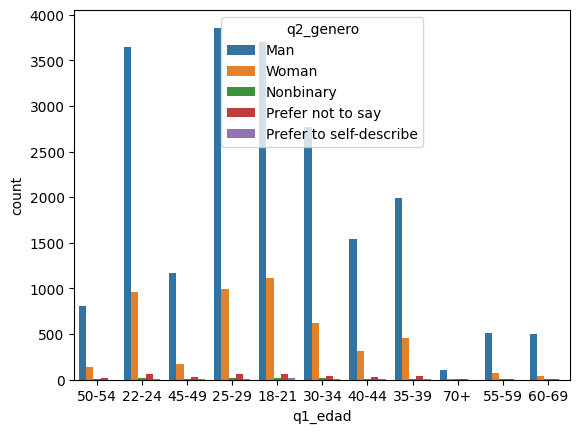

In [26]:
sns.countplot(data=df_perfil , x= "q1_edad", hue= "q2_genero");

In [27]:
df_perfil.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech'],
      dtype='object')

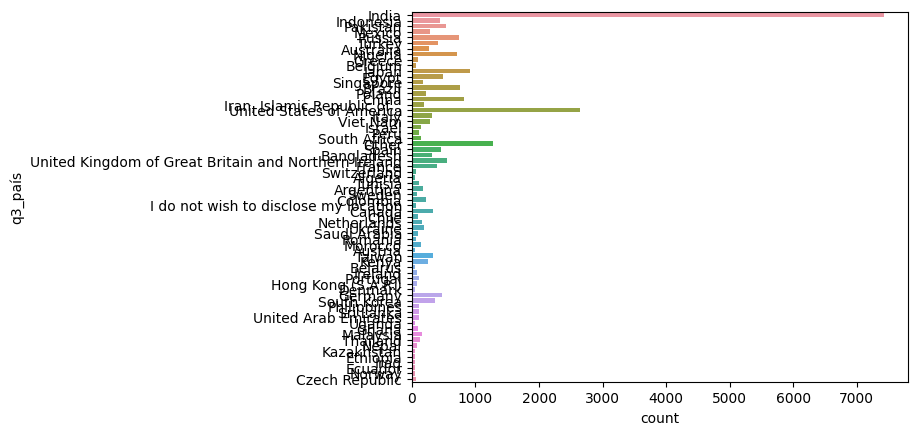

In [36]:
sns.countplot(data=df_perfil , y= 'q3_país');

In [32]:
df['q4_educacion'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: q4_educacion, dtype: int64

In [49]:
df_ocupacion = df_perfil.q5_ocupacion.value_counts().reset_index()

In [50]:
df_ocupacion.head()

,index,q5_ocupacion
0,Student,6804
1,Data Scientist,3616
2,Software Engineer,2449
3,Other,2393
4,Data Analyst,2301


<AxesSubplot:xlabel='q5_ocupacion', ylabel='index'>

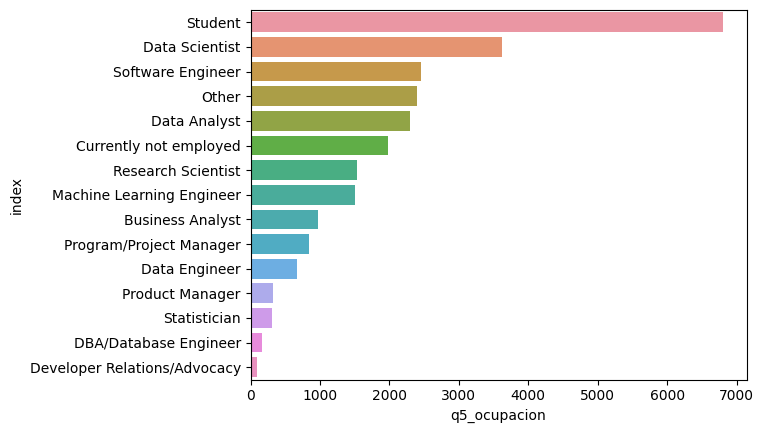

In [54]:
sns.barplot( y = "index" , x= "q5_ocupacion" , data=df_ocupacion )

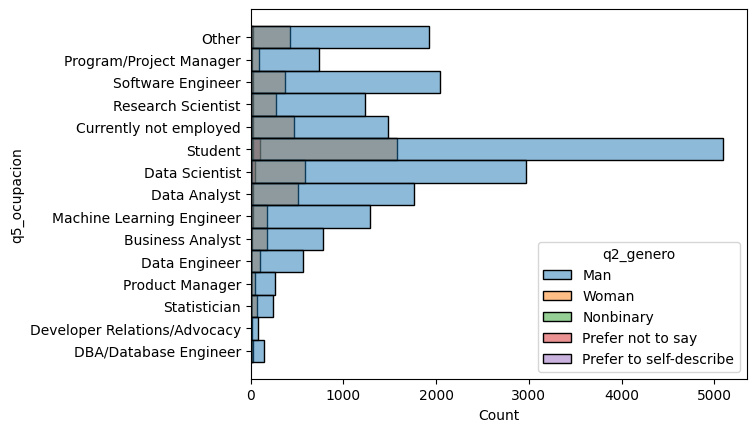

In [56]:
fig = sns.histplot(y= "q5_ocupacion",  data=df, hue="q2_genero" )

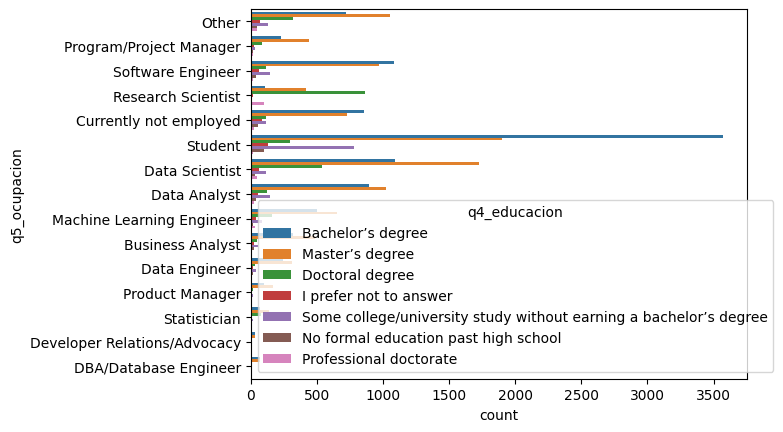

In [39]:
sns.countplot(data=df_perfil , y= "q5_ocupacion" , hue= 'q4_educacion');

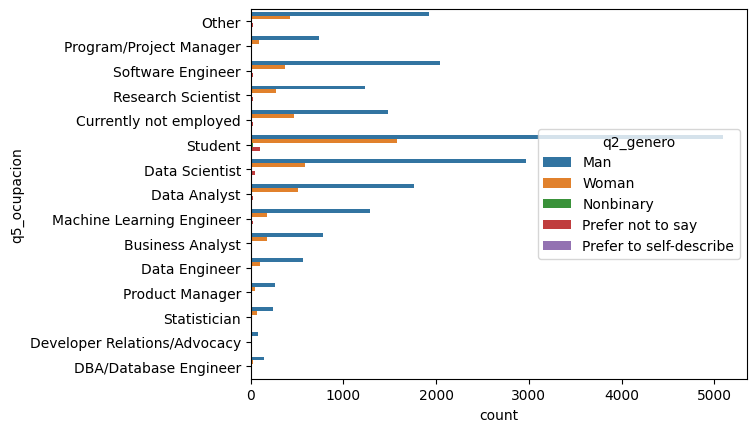

In [34]:
sns.countplot(data=df_perfil , y= 'q5_ocupacion', hue=  "q2_genero");

In [37]:
df_perfil.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech'],
      dtype='object')

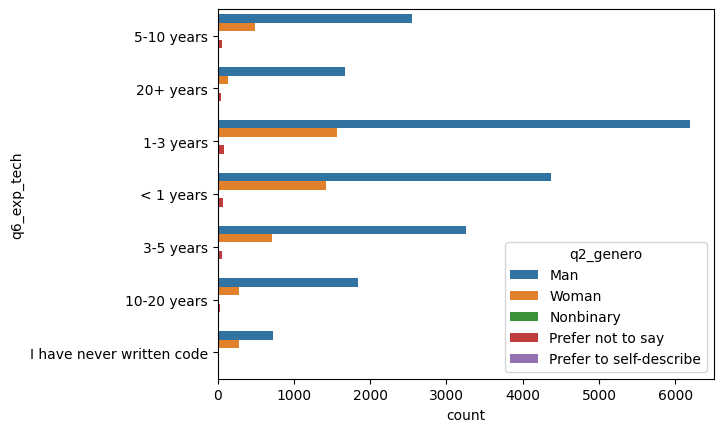

In [38]:
sns.countplot(data=df_perfil , y= 'q6_exp_tech', hue=  "q2_genero");